In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
from mlxtend.preprocessing import TransactionEncoder
import time
import warnings
warnings.filterwarnings('ignore')

In [138]:
os.chdir("C:/Users/mmarg/OneDrive/PBS/Descriptive Analytics/Data")
products = pd.read_csv('Product_info.csv')
account = pd.read_csv('Account_info.csv')
sales = pd.read_csv('Sales_info.csv')

In [139]:
print(type(products))
products

<class 'pandas.core.frame.DataFrame'>


,encrypt_sku,product_dsc,sub_cat_cd,subcat_dsc_ext,catg_cd,cat_dsc_ext,department_cd,department_dsc_ext,brand_cd,brand_dsc,capacity_unit,conversion_factor
0,23121635,DET LÍQ MÁQ ROUPA OMO 96D,10102,det. máq. líquido,101,limp. e tratam roupa,10,ALIMENTAR,12231,OMO,DO,96.00
1,23226017,DET LÍQ MÁQ ROUPA OMO 55D,10102,det. máq. líquido,101,limp. e tratam roupa,10,ALIMENTAR,12231,OMO,DO,55.00
2,15751913,DET MAN PÓ ROUPA OMO 540GR,10104,det. manual roupa,101,limp. e tratam roupa,10,ALIMENTAR,12231,OMO,KG,0.54
3,22159862,TOALHITAS PROTEÇÃO COR CONTINENTE 20UN,10106,aux. limpeza roupa,101,limp. e tratam roupa,10,ALIMENTAR,9798,CONTINENTE,UN,20.00
4,22765574,(I)DESINFE LIQUIDO ROUPACNT PRO 500ML,10106,aux. limpeza roupa,101,limp. e tratam roupa,10,ALIMENTAR,38313,CONT.PROTECT,LT,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...
2906,23992205,MASSA PANZANI MACH EXP.500G,10204,massas,102,ingredientes básicos,10,ALIMENTAR,12311,PANZANI,UN,1.00
2907,23992193,MASSA PANZANI SPAG EXP.500G,10204,massas,102,ingredientes básicos,10,ALIMENTAR,12311,PANZANI,UN,1.00
2908,23992199,MASSA PANZANI FARFALLE 500G,10204,massas,102,ingredientes básicos,10,ALIMENTAR,12311,PANZANI,UN,1.00
2909,23959868,PASTA BERRUTO ARRIGHI CONCHIGLIO 500G,10204,massas,102,ingredientes básicos,10,ALIMENTAR,41369,BERRUTO,UN,1.00


In [140]:
print(type(account))
account

<class 'pandas.core.frame.DataFrame'>


,account_no,family_members,segment_gender_f,segment_gender_m,age_group,district,region,segment_cd_lifestyle,segment_dsc_lifestyle,segment_cd_lifestage,segment_dsc_lifestage
0,839904903518,5,0,0,>=65 anos,braga,litoral norte,1,Os Saudáveis Exigentes,2,Senior
1,839915544120,3,0,0,55-65 anos,braga,litoral norte,5,Os Tradicionais Frequentes,4,Family With Kids
2,839958948398,4,0,0,35-45 anos,aveiro,litoral norte,3,Os Pais Práticos,4,Family With Kids
3,839960123646,17,0,0,45-55 anos,porto,litoral norte,5,Os Tradicionais Frequentes,4,Family With Kids
4,839991834603,1,0,0,55-65 anos,NaN,NaN,7,Os Promocionais Atentos,3,Family With Young Adults
...,...,...,...,...,...,...,...,...,...,...,...
3108,840267515632,3,0,0,35-45 anos,setúbal,litoral sul,7,Os Promocionais Atentos,5,Active Adults
3109,840271411371,2,0,0,25-35 anos,aveiro,litoral norte,6,Os Económicos Focados,5,Active Adults
3110,840297031294,2,0,0,35-45 anos,ilha da madeira,litoral sul,1,Os Saudáveis Exigentes,5,Active Adults
3111,840297937268,1,0,0,18-25 anos,setúbal,litoral sul,2,Os Urbanos Sofisticados,3,Family With Young Adults


In [141]:
print(type(sales))
sales

<class 'pandas.core.frame.DataFrame'>


,account_no,transaction_id,time_key,pos_tp_cd,encrypt_sku,qty,net_sls_amt,gross_sls_amt,direct_dscnt_amt,trans_direct_dscnt_amt,prod_dscnt_issued_amt
0,839916284315,VQtBg34k3y8DYPyn2CJJ5WwgYRLkUOV0DBbg8maH57qpCK...,20240409,P,21312116,1.000,0.89,1.09,0.0,0.10,0.00
1,840083777702,5g8OiZsYizvSpitcTnQNPI7Hlvow4EWXGYJdrwfs3ffHqx...,20240421,P,15244838,4.000,1.63,2.00,2.0,3.15,0.00
2,840083777702,5g8OiZsYizvSpitcTnQNPI7Hlvow4EWXGYJdrwfs3ffHqx...,20240421,P,22020944,1.000,1.94,2.39,0.8,3.15,0.00
3,847107330837,jjkELCpw5ys0x885Q0++d/RiLZJBIUKeTvvr6t/719jPfP...,20240404,P,6071048,1.000,0.82,0.87,0.0,11.26,0.09
4,847107330837,jjkELCpw5ys0x885Q0++d/RiLZJBIUKeTvvr6t/719jPfP...,20240404,P,20167550,1.000,5.36,6.59,4.4,11.26,0.66
...,...,...,...,...,...,...,...,...,...,...,...
148115,840019224482,s54OsJxcTBAxTjc5kHEJdXnyMagDX/rNCyrA+D4MHW48G+...,20240903,P,21862649,1.000,1.13,1.39,0.0,7.80,0.00
148116,840019224482,s54OsJxcTBAxTjc5kHEJdXnyMagDX/rNCyrA+D4MHW48G+...,20240903,P,19242485,1.000,0.97,1.19,0.0,7.80,0.00
148117,840019224482,2fL94Vy/w4uWWJJXhYwg+XmWdbokEpLEOyb439p7nLxnij...,20240922,P,20670689,1.000,1.27,1.35,0.0,0.20,0.00
148118,839967948997,51X+G6JcrvmpQNgT+H6UJ+4Ms1nqOr2LUsFmuwmfCPiQT5...,20241023,P,24000260,1.000,2.68,3.30,0.0,2.73,0.52


In [142]:
#Encrypted SKU & Product Name
sales_merged = sales.merge(products [['encrypt_sku','product_dsc', 'cat_dsc_ext']], on='encrypt_sku', how='left')
sales_merged.head(1)

,account_no,transaction_id,time_key,pos_tp_cd,encrypt_sku,qty,net_sls_amt,gross_sls_amt,direct_dscnt_amt,trans_direct_dscnt_amt,prod_dscnt_issued_amt,product_dsc,cat_dsc_ext
0,839916284315,VQtBg34k3y8DYPyn2CJJ5WwgYRLkUOV0DBbg8maH57qpCK...,20240409,P,21312116,1.0,0.89,1.09,0.0,0.1,0.0,(I)NACHOS COM SAL CONTINENTE 150G,aperitivos


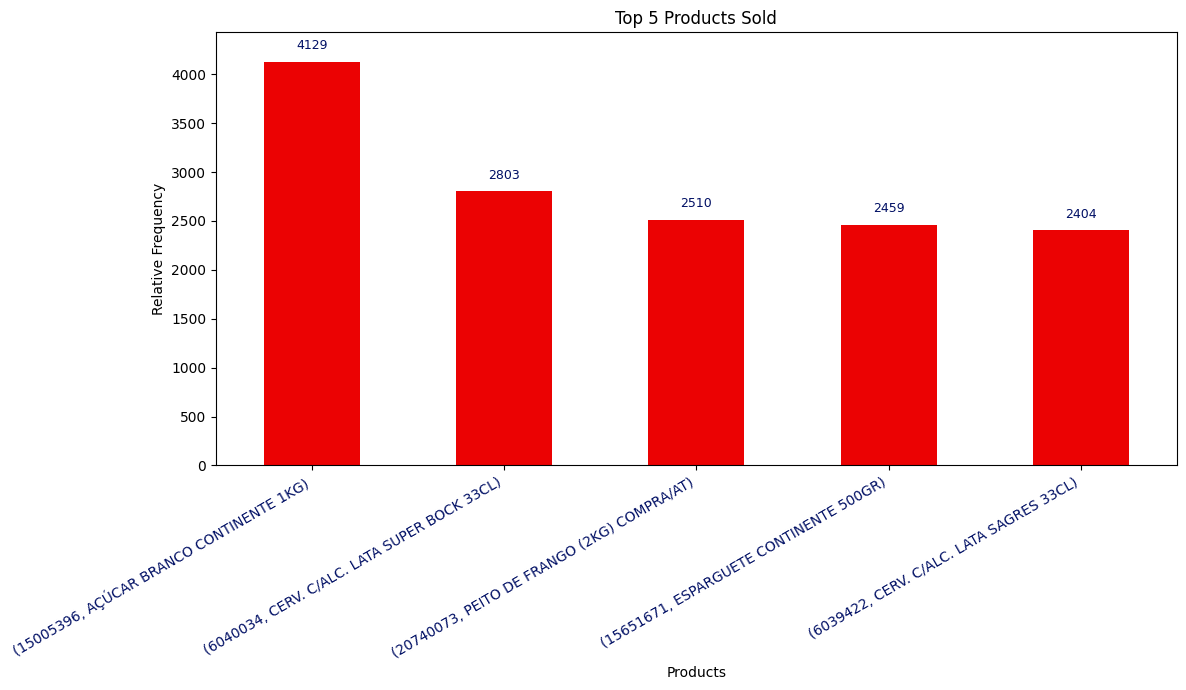

In [143]:
# Calcular a quantidade total vendida por produto
products_frequency = sales_merged.groupby(['encrypt_sku', 'product_dsc'])['qty'].sum().sort_values(ascending=False)
products_frequency


import matplotlib.pyplot as plt

# Aumentar tamanho do gráfico para mais espaço vertical
plt.figure(figsize=(12, 7))

# Plotar gráfico e capturar as barras

bars = top_5_products.plot(kind='bar', color='#EB0203')

# Títulos com cor
plt.title('Top 5 Products Sold', color='#000000')
plt.ylabel('Relative Frequency', color='#000000')
plt.xlabel('Products', color='#000000')

# Ajustar rótulos do eixo X
plt.xticks(rotation=30, ha='right', color='#000F64')
plt.yticks(color='#000000')

# Adicionar rótulos de dados com mais espaço acima das barras
for bar in bars.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 100,  # maior espaço acima da barra
        f'{int(height)}',
        ha='center',
        va='bottom',
        color='#000F64',
        fontsize=9
    )

# Aumentar o limite superior do eixo Y para evitar corte
plt.ylim(0, top_5_products.max() + 300)

# Melhorar layout para evitar cortes
plt.tight_layout()
plt.show()





In [144]:
products_frequency.describe()


count    2911.000000
mean       65.381788
std       203.160754
min         0.000000
25%         3.000000
50%        13.000000
75%        43.247500
max      4129.000000
Name: qty, dtype: float64

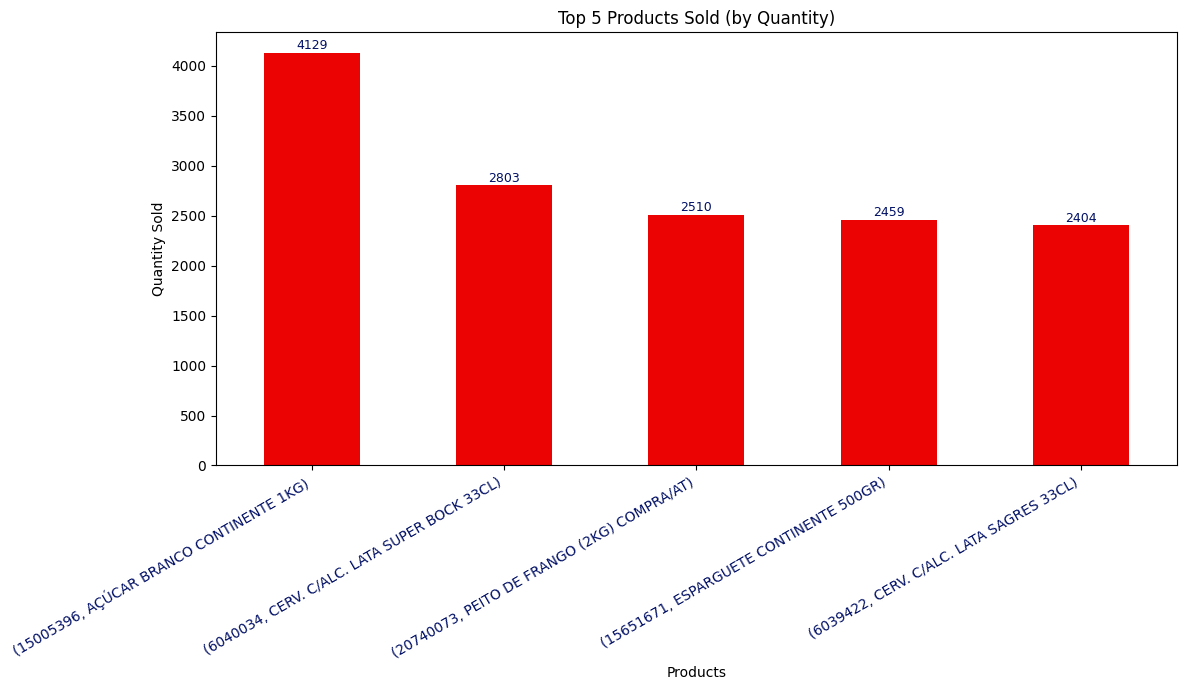

In [145]:
# Selecionar os 5 produtos mais vendidos
top_5_products = products_frequency.head(5)

# Ajustar o tamanho do gráfico
plt.figure(figsize=(12, 7))

# Plotar o gráfico de barras
bars = top_5_products.plot(kind='bar', color='#EB0203')

# Títulos e rótulos com cor preta
plt.title('Top 5 Products Sold (by Quantity)', color='#000000')
plt.ylabel('Quantity Sold', color='#000000')
plt.xlabel('Products', color='#000000')

# Estilizar os eixos
plt.xticks(rotation=30, ha='right', color='#000F64')
plt.yticks(color='#000000')

# Adicionar rótulos nas barras
for bar in bars.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 5,
        f'{int(height)}',
        ha='center',
        va='bottom',
        color='#000f64',
        fontsize=9
    )

# Ajustar layout
plt.tight_layout()
plt.show()


In [146]:
#Caracterization of the Transactions
transaction_sizes = sales_merged.groupby('transaction_id')['product_dsc'].count()
transaction_sizes.describe()

count    58593.000000
mean         2.527947
std          2.192949
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         25.000000
Name: product_dsc, dtype: float64

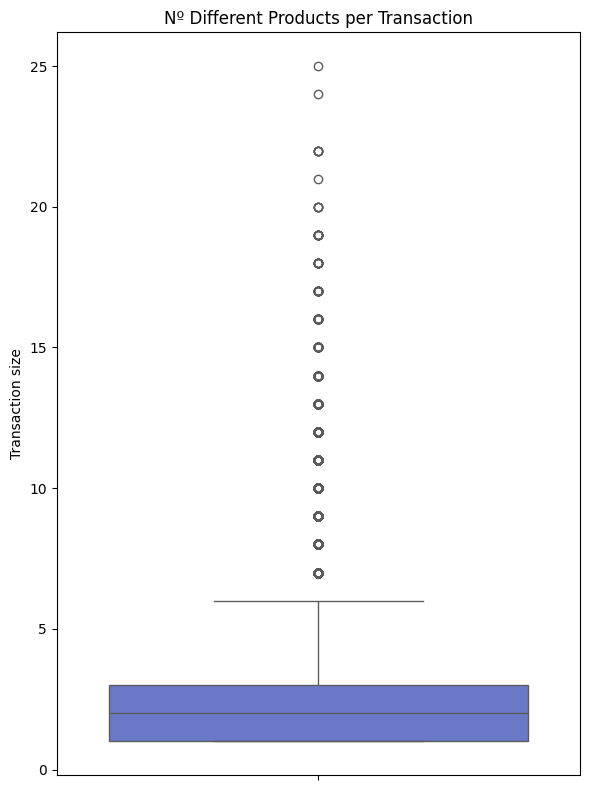

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tamanho da figura
plt.figure(figsize=(6, 8))

# Boxplot vertical com cor azul
sns.boxplot(y=transaction_sizes, color="#5a6dd8")

# Título e rótulos em preto
plt.title('Nº Different Products per Transaction', color='#000000')
plt.ylabel('Transaction size', color='#000000')
plt.xticks(color='#000000')
plt.yticks(color='#000000')

# Layout ajustado
plt.tight_layout()
plt.show()


In [148]:
# Quantas transações únicas existem
num_transactions = sales_merged['transaction_id'].nunique()

# Para cada produto, contar em quantas transações ele aparece
product_transaction_counts = sales_merged.groupby('product_dsc')['transaction_id'].nunique()

# Calcular o suporte: frequência relativa de transações
product_support = product_transaction_counts / num_transactions

# Filtrar produtos com suporte >= 0.02

products_with_support = product_support[product_support >= 0.02]

print(f"Número de produtos com suporte >= 0.02: {len(products_with_support)}")
products_with_support.sort_values(ascending=False)



Número de produtos com suporte >= 0.02: 10


product_dsc
AÇÚCAR BRANCO CONTINENTE 1KG                0.053368
PEITO DE FRANGO (2KG) COMPRA/AT             0.036967
ESPARGUETE CONTINENTE 500GR                 0.028928
ESPARGUETE CONTINENTE 1KG                   0.027085
BIFE DE FRANGO CONTINENTE LS                0.023245
ARROZ BASMATI CONTINENTE 1KG                0.022545
ARROZ AGULHA CIGALA 1KG                     0.021999
PEITO FRANGO CONTINENTE LS                  0.021061
BATATA FRITA CAMPONESA CONTINENTE 175 GR    0.020770
BATATA FRITA PALHA CONT.POUPANCA 400G       0.020429
Name: transaction_id, dtype: float64

In [149]:
# Encode the Transactions
transactions = sales_merged.groupby('transaction_id')['product_dsc'].apply(list).tolist()
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
transactions_matrix = te.fit_transform(transactions)
encoded_sales = pd.DataFrame(transactions_matrix, columns=te.columns_)
encoded_sales.head(1)


,(AÇ) FRANGO INTEIRO C/ MIÚDOS,(AÇ) FRANGO S/MIUDOS CONG COPRAVE KG PM,(AÇ) NOVILHO ACÉM COMPRIDO CFA,(AÇ) NOVILHO BIFE DO REDONDO CFA,(AÇ) NOVILHO BIFE POJADOURO ANGUS AT KG,(AÇ) NOVILHO ESCALOPES CFA,(AÇ) NOVILHO FIGADO FRESCO CFA KG,(AÇ) NOVILHO JARDINEIRA 2ª CFA LS,(AÇ) NOVILHO MEDALHÕES CFA LS,(AÇ) NOVILHO OSSO BUCKO CFA LS,...,XILITOL BIO SEARA 250G SEARA 250G,ZERO BAR 40 G - CARAM PROZIS BX TEOR DE,ZERO BAR LOW SUGARS FUDGE PROZIS 40G,ZINCO SUPLA 40CPS,ZITI TAGLIATI DIVELLA 500GR,ZITONI RAGLIATI DIVELLA 500GR,ZMA ÉVOLUTION 60 CAPS EU NUTRITION,"\EXTRA \""\""BARRIGUINHA\""\"" 30CP\""""",ÁGUA P/FERRO PERFUMADA CONTINENTE 1LT,ÁGUA PERF P/FERRO COMFORT VAPORESSE 1L
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [154]:
# Run Apriori to Get Frequent Co-Purchased Products (0,2% of the transactions)
min_supp = 0.002

freq_copurchased = apriori(encoded_sales, min_support=min_supp, use_colnames=True) 
print(f"Number of Frequent Co-Purchased Products: {len(freq_copurchased)}")
freq_copurchased['length'] = freq_copurchased['itemsets'].apply(len)

length_counts = freq_copurchased['length'].value_counts().sort_index()

for length, count in length_counts.items():
    print(f"Number of itemsets with {length} item(s): {count}")

Number of Frequent Co-Purchased Products: 316
Number of itemsets with 1 item(s): 293
Number of itemsets with 2 item(s): 23


In [ ]:
freq_copurchased.sort_values(by= "support",ascending=False)

,support,itemsets,length
46,0.053368,(AÇÚCAR BRANCO CONTINENTE 1KG),1
230,0.036967,(PEITO DE FRANGO (2KG) COMPRA/AT),1
147,0.028928,(ESPARGUETE CONTINENTE 500GR),1
146,0.027085,(ESPARGUETE CONTINENTE 1KG),1
79,0.023245,(BIFE DE FRANGO CONTINENTE LS),1
...,...,...,...
307,0.002014,"(MAS.ESPIRAIS CONTINENTE 500GR, AÇÚCAR BRANCO ...",2
218,0.002014,(NACHOS COM SAL CNT PACK POUPANÇA 300G),1
208,0.002014,(MASSA LINGUINE MILANEZA 500GR),1
178,0.002014,(LASANHA COM OVO CONTINENTE 500 GR),1


In [ ]:
#Generate association rules from frequent itemsets
min_conf=0.2
rules = association_rules(freq_copurchased, metric="confidence", min_threshold=min_conf,num_itemsets=0.2)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(FAR TRIGO C/FER SUP FINA CONTINENTE 1KG),(AÇÚCAR BRANCO CONTINENTE 1KG),0.006451,0.053368,0.002577,0.399471,7.485193,1.0,0.002233,1.576330,0.872029,0.045021,0.365615,0.223880
1,(FAR.TRIGO FINAC/F BRANCA NEVE 1KG),(AÇÚCAR BRANCO CONTINENTE 1KG),0.011725,0.053368,0.003789,0.323144,6.054999,1.0,0.003163,1.398572,0.844752,0.061804,0.284985,0.197069
2,(BATATA FRITA ONDULADA PRESUNTO CNT 175 G),(BATATA FRITA CAMPONESA CONTINENTE 175 GR),0.011810,0.020770,0.002458,0.208092,10.018704,1.0,0.002212,1.236545,0.910945,0.081586,0.191295,0.163208
3,(MAS.ESPIRAIS CONTINENTE 500GR),(ESPARGUETE CONTINENTE 1KG),0.014473,0.027085,0.003055,0.211085,7.793382,1.0,0.002663,1.233231,0.884487,0.079344,0.189122,0.161938
4,(PERNA DE FRANGO (2KG) COMPRA/AT),(PEITO DE FRANGO (2KG) COMPRA/AT),0.014336,0.036967,0.003499,0.244048,6.601792,1.0,0.002969,1.273934,0.860868,0.073188,0.215030,0.169346
5,(PERU PEITO (BIFE) - AT),(PEITO DE FRANGO (2KG) COMPRA/AT),0.015275,0.036967,0.003499,0.229050,6.196096,1.0,0.002934,1.249152,0.851616,0.071779,0.199457,0.161847


Número de combinações com suporte >= 0.002: 23


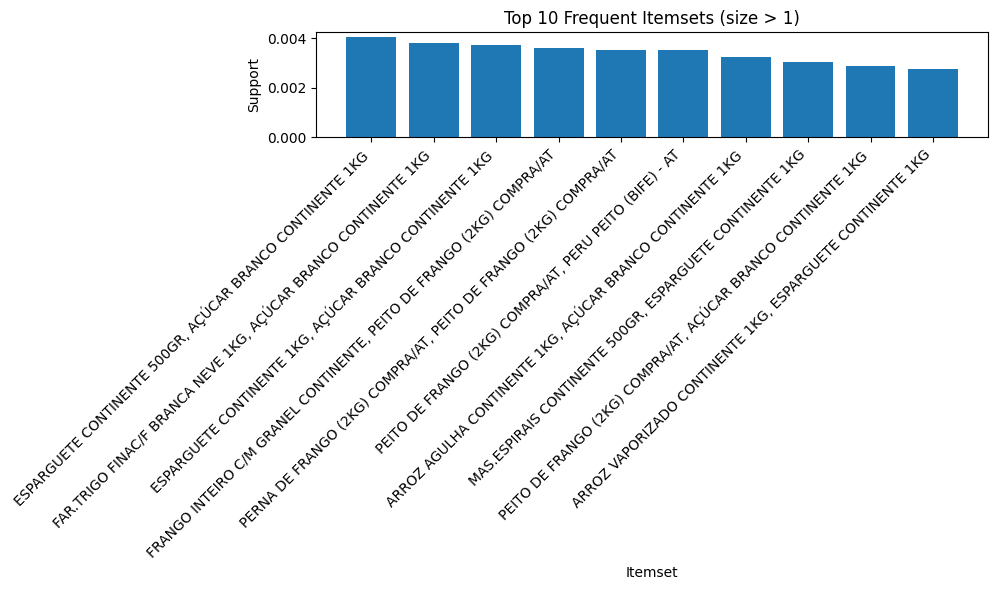

In [ ]:
from mlxtend.frequent_patterns import apriori
import matplotlib.pyplot as plt

# Run Apriori with lower support
min_supp = 0.002  # 0.2%
freq_copurchased = apriori(encoded_sales, min_support=min_supp, use_colnames=True)

# Add length of itemset
freq_copurchased['length'] = freq_copurchased['itemsets'].apply(lambda x: len(x))

# Filter itemsets with more than 1 item (i.e., combinations)
filtered = freq_copurchased[freq_copurchased['length'] > 1]

# Check if there are any
print(f"Número de combinações com suporte >= {min_supp}: {len(filtered)}")

if not filtered.empty:
    # Get top 10 by support
    top10 = filtered.sort_values(by='support', ascending=False).head(10)
    
    # Convert sets to strings for labeling
    top10['itemset_str'] = top10['itemsets'].apply(lambda x: ', '.join(x))

    # Plot
    plt.figure(figsize=(10, 6))
    plt.bar(top10['itemset_str'], top10['support'])
    plt.title("Top 10 Frequent Itemsets (size > 1)")
    plt.xlabel("Itemset")
    plt.ylabel("Support")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Ainda não há itemsets de tamanho > 1 com esse suporte mínimo.")


In [ ]:
from mlxtend.frequent_patterns import association_rules


rules = association_rules(freq_copurchased, metric="confidence", min_threshold=0.2)

rules['antecedent_len'] = rules['antecedents'].apply(lambda x: len(x))

rules_filtered = rules[(rules['antecedent_len'] >= 1) & (rules['support'] >= 0.002)]

top10_rules = rules_filtered.sort_values(by='support', ascending=False).head(10)

top10_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]


,antecedents,consequents,support,confidence,lift
1,(FAR.TRIGO FINAC/F BRANCA NEVE 1KG),(AÇÚCAR BRANCO CONTINENTE 1KG),0.003789,0.323144,6.054999
5,(PERU PEITO (BIFE) - AT),(PEITO DE FRANGO (2KG) COMPRA/AT),0.003499,0.229050,6.196096
4,(PERNA DE FRANGO (2KG) COMPRA/AT),(PEITO DE FRANGO (2KG) COMPRA/AT),0.003499,0.244048,6.601792
3,(MAS.ESPIRAIS CONTINENTE 500GR),(ESPARGUETE CONTINENTE 1KG),0.003055,0.211085,7.793382
0,(FAR TRIGO C/FER SUP FINA CONTINENTE 1KG),(AÇÚCAR BRANCO CONTINENTE 1KG),0.002577,0.399471,7.485193
2,(BATATA FRITA ONDULADA PRESUNTO CNT 175 G),(BATATA FRITA CAMPONESA CONTINENTE 175 GR),0.002458,0.208092,10.018704


In [ ]:
# Supondo que você tenha um DataFrame com as transações (ex: trans_id, cat_dsc_ext)
# Agrupar categorias por transação
basket = sales_merged.groupby(['transaction_id', 'cat_dsc_ext']).size().unstack().fillna(0)

# Converter para 1/0 (presença/ausência do item)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)


In [ ]:
from mlxtend.frequent_patterns import apriori

# Gerar itemsets frequentes com suporte mínimo
freq_items = apriori(basket, min_support=0.002, use_colnames=True)


In [ ]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(freq_items, metric="confidence", min_threshold=0.2)

In [ ]:
# Adicionar tamanho do antecedente
rules['antecedent_len'] = rules['antecedents'].apply(lambda x: len(x))

# Filtrar regras com pelo menos 1 item no antecedente e suporte mínimo
rules_filtered = rules[(rules['antecedent_len'] >= 1) & (rules['support'] >= 0.002)]

# Ordenar pelas 10 regras com maior confiança
top10_rules = rules_filtered.sort_values(by='confidence', ascending=False).head(10)

# Mostrar como tabela limpa (sem índice)
print("\n=== ASSOCIATION RULES GENERATION ===")
print(f"Generated {len(rules_filtered)} association rules\n")
print("Top 10 rules by confidence:\n")
print(top10_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].to_string(index=False))




=== ASSOCIATION RULES GENERATION ===
Generated 365 association rules

Top 10 rules by confidence:

                                                            antecedents            consequents  support  confidence     lift
(aperitivos, vegetais e frut cong, limp. e tratam roupa, aves e coelho) (ingredientes básicos) 0.003004    0.854369 2.136032
    (vegetais e frut cong, bovino, limp. e tratam roupa, aves e coelho) (ingredientes básicos) 0.002270    0.777778 1.944544
              (aperitivos, bovino, limp. e tratam roupa, aves e coelho) (ingredientes básicos) 0.002918    0.777273 1.943281
            (vegetais e frut cong, limp. e tratam roupa, aves e coelho) (ingredientes básicos) 0.007117    0.772222 1.930654
               (aperitivos, vegetais e frut cong, limp. e tratam roupa) (ingredientes básicos) 0.006554    0.766467 1.916266
                          (aperitivos, bovino, cervejas, aves e coelho) (ingredientes básicos) 0.002031    0.757962 1.895001
              (aperitivos

Let´s segment the customer for the itemset of "Perna de Frango" and "Peito de frango"

In [ ]:
# ----------------------------
# 2. Merge ALL product and account columns into sales
# ----------------------------
sales_merged_account = sales_merged.merge(account, on='account_no', how='left')  # All account columns

# ----------------------------
# 3. Build transactions from ALL account characteristics per transaction
# ----------------------------

# Drop columns not useful for profiling (like IDs, dates, numbers)
account_cols = account.select_dtypes(include='object').columns.tolist()
account_cols = [col for col in account_cols if col != 'account_no']  # Remove ID column

# Fill NAs to avoid issues
sales_merged_account[account_cols] = sales_merged_account[account_cols].fillna('Missing')

# Aggregate account features by transaction
account_features = sales_merged_account.groupby('transaction_id')[account_cols].agg(lambda x: list(set(x)))

# Convert each transaction into a flat list of attribute values
transactions = account_features.apply(lambda row: sum(row.tolist(), []), axis=1).tolist()

# ----------------------------
# 4. Define WRAcc target: 1 if flour + sugar are both bought
# ----------------------------
product_groups = sales_merged_account.groupby('transaction_id')['product_dsc'].apply(list)
'''
transaction_targets = product_groups.apply(lambda items: int(
    'FAR TRIGO C/FER SUP FINA CONTINENTE 1KG' in items and
    'AÇÚCAR BRANCO CONTINENTE 1KG' in items)).reset_index(drop=True)

# ----------------------------
# 5. Encode account characteristics using TransactionEncoder
# ----------------------------
te = TransactionEncoder()
transactions_matrix = te.fit_transform(transactions)
encoded_sales = pd.DataFrame(transactions_matrix, columns=te.columns_)

# ----------------------------
# 6. Run Apriori (min support ≥ 0.2%)
# ----------------------------
min_support = 0.002
frequent_itemsets = apriori(encoded_sales, min_support=min_support, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

# ----------------------------
# 7. Compute WRAcc
# ----------------------------
def compute_wracc(itemset, df, y):
    if not itemset:
        return 0
    cover = df[list(itemset)].all(axis=1)
    if cover.sum() == 0:
        return 0
    p_s = y[cover].mean()
    p_d = y.mean()
    return cover.mean() * (p_s - p_d)

frequent_itemsets['WRAcc'] = frequent_itemsets['itemsets'].apply(
    lambda s: compute_wracc(s, encoded_sales, transaction_targets)
)

# ----------------------------
# 8. Show top itemsets by WRAcc
# ----------------------------
filtered = frequent_itemsets[frequent_itemsets['length'] >= 1]
print(f"\nNúmero de combinações com suporte >= {min_support}: {len(filtered)}")

if not filtered.empty:
    top10 = filtered.sort_values(by='WRAcc', ascending=False).head(20)
    print("\nTop 10 Account Characteristic Combinations by WRAcc (length >= 1):\n")
    print(top10[['itemsets', 'support', 'WRAcc']].to_string(index=False))
else:
    print("Ainda não há combinações de características de conta com esse suporte mínimo.")
'''
# ----------------------------Agora testar para outro conjunto de dados----------------------------

transaction_targets = product_groups.apply(lambda items: int(
    'PERNA DE FRANGO (2KG) COMPRA/AT' in items and
    'PEITO DE FRANGO (2KG) COMPRA/AT' in items)).reset_index(drop=True)

# ----------------------------
# 5. Encode account characteristics using TransactionEncoder
# ----------------------------
te = TransactionEncoder()
transactions_matrix = te.fit_transform(transactions)
encoded_sales = pd.DataFrame(transactions_matrix, columns=te.columns_)

# ----------------------------
# 6. Run Apriori (min support ≥ 0.2%)
# ----------------------------
min_support = 0.002
frequent_itemsets = apriori(encoded_sales, min_support=min_support, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

# ----------------------------
# 7. Compute WRAcc
# ----------------------------
def compute_wracc(itemset, df, y):
    if not itemset:
        return 0
    cover = df[list(itemset)].all(axis=1)
    if cover.sum() == 0:
        return 0
    p_s = y[cover].mean()
    p_d = y.mean()
    return cover.mean() * (p_s - p_d)

frequent_itemsets['WRAcc'] = frequent_itemsets['itemsets'].apply(
    lambda s: compute_wracc(s, encoded_sales, transaction_targets)
)

# ----------------------------
# 8. Show top itemsets by WRAcc
# ----------------------------
filtered = frequent_itemsets[frequent_itemsets['length'] >= 1]
print(f"\nNúmero de combinações com suporte >= {min_support}: {len(filtered)}")

if not filtered.empty:
    top10 = filtered.sort_values(by='WRAcc', ascending=False).head(20)
    print("\nTop 10 Account Characteristic Combinations by WRAcc (length >= 1):\n")
    print(top10[['itemsets', 'support', 'WRAcc']].to_string(index=False))
else:
    print("Ainda não há combinações de características de conta com esse suporte mínimo.")


Número de combinações com suporte >= 0.002: 2445

Top 10 Account Characteristic Combinations by WRAcc (length >= 1):

                                                                             itemsets  support    WRAcc
                                                           (Family With Young Adults) 0.103067 0.000698
                                                               (litoral norte, porto) 0.171590 0.000543
                                                                              (porto) 0.171590 0.000543
                                                                      (litoral norte) 0.290325 0.000469
                                               (Family With Young Adults, 45-55 anos) 0.036796 0.000452
                                     (litoral norte, Family With Young Adults, porto) 0.016811 0.000402
                                                    (Family With Young Adults, porto) 0.016811 0.000402
                                            (lito

Let´s segment the customer for the itemset of "FAR TRIGO C/FER SUP FINA CONTINENTE 1KG" and "AÇÚCAR BRANCO CONTINENTE 1KG"

In [ ]:
transaction_targets = product_groups.apply(lambda items: int(
    'FAR TRIGO C/FER SUP FINA CONTINENTE 1KG' in items and
    'AÇÚCAR BRANCO CONTINENTE 1KG' in items)).reset_index(drop=True)

# ----------------------------
# 5. Encode account characteristics using TransactionEncoder
# ----------------------------
te = TransactionEncoder()
transactions_matrix = te.fit_transform(transactions)
encoded_sales = pd.DataFrame(transactions_matrix, columns=te.columns_)

# ----------------------------
# 6. Run Apriori (min support ≥ 0.2%)
# ----------------------------
min_support = 0.002
frequent_itemsets = apriori(encoded_sales, min_support=min_support, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

# ----------------------------
# 7. Compute WRAcc
# ----------------------------
def compute_wracc(itemset, df, y):
    if not itemset:
        return 0
    cover = df[list(itemset)].all(axis=1)
    if cover.sum() == 0:
        return 0
    p_s = y[cover].mean()
    p_d = y.mean()
    return cover.mean() * (p_s - p_d)

frequent_itemsets['WRAcc'] = frequent_itemsets['itemsets'].apply(
    lambda s: compute_wracc(s, encoded_sales, transaction_targets)
)

# ----------------------------
# 8. Show top itemsets by WRAcc
# ----------------------------
filtered = frequent_itemsets[frequent_itemsets['length'] >= 1]
print(f"\nNúmero de combinações com suporte >= {min_support}: {len(filtered)}")

if not filtered.empty:
    top10 = filtered.sort_values(by='WRAcc', ascending=False).head(20)
    print("\nTop 10 Account Characteristic Combinations by WRAcc (length >= 1):\n")
    print(top10[['itemsets', 'support', 'WRAcc']].to_string(index=False))
else:
    print("Ainda não há combinações de características de conta com esse suporte mínimo.")


Número de combinações com suporte >= 0.002: 2445

Top 10 Account Characteristic Combinations by WRAcc (length >= 1):

                                                      itemsets  support    WRAcc
                                  (Os Tradicionais Frequentes) 0.185858 0.000340
                                       (Os Económicos Focados) 0.159848 0.000339
                  (litoral centro, Os Tradicionais Frequentes) 0.017971 0.000329
                                              (litoral centro) 0.078508 0.000293
                           (45-55 anos, Os Económicos Focados) 0.040756 0.000236
          (leiria, litoral centro, Os Tradicionais Frequentes) 0.009421 0.000215
                          (leiria, Os Tradicionais Frequentes) 0.009421 0.000215
                   (Active Adults, Os Tradicionais Frequentes) 0.057413 0.000210
                                      (leiria, litoral centro) 0.044732 0.000209
                                                      (leiria) 0.044732

In [ ]:
# ----------------------------
# 1. Define transaction targets for the new rule
# ----------------------------
transaction_targets = product_groups.apply(lambda items: int(
    'BATATA FRITA ONDULADA PRESUNTO CNT 175 G' in items and
    'BATATA FRITA CAMPONESA CONTINENTE 175 GR' in items)).reset_index(drop=True)

# ----------------------------
# 5. Encode account characteristics using TransactionEncoder
# ----------------------------
te = TransactionEncoder()
transactions_matrix = te.fit_transform(transactions)
encoded_sales = pd.DataFrame(transactions_matrix, columns=te.columns_)

# ----------------------------
# 6. Run Apriori (min support ≥ 0.2%)
# ----------------------------
min_support = 0.002
frequent_itemsets = apriori(encoded_sales, min_support=min_support, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

# ----------------------------
# 7. Compute WRAcc
# ----------------------------
def compute_wracc(itemset, df, y):
    if not itemset:
        return 0
    cover = df[list(itemset)].all(axis=1)
    if cover.sum() == 0:
        return 0
    p_s = y[cover].mean()
    p_d = y.mean()
    return cover.mean() * (p_s - p_d)

frequent_itemsets['WRAcc'] = frequent_itemsets['itemsets'].apply(
    lambda s: compute_wracc(s, encoded_sales, transaction_targets)
)

# ----------------------------
# 8. Show top itemsets by WRAcc
# ----------------------------
filtered = frequent_itemsets[frequent_itemsets['length'] >= 1]
print(f"\nNúmero de combinações com suporte >= {min_support}: {len(filtered)}")

if not filtered.empty:
    top10 = filtered.sort_values(by='WRAcc', ascending=False).head(20)
    print("\nTop 10 Account Characteristic Combinations by WRAcc (length >= 1):\n")
    print(top10[['itemsets', 'support', 'WRAcc']].to_string(index=False))
else:
    print("Ainda não há combinações de características de conta com esse suporte mínimo.")



Número de combinações com suporte >= 0.002: 2445

Top 10 Account Characteristic Combinations by WRAcc (length >= 1):

                                                                   itemsets  support    WRAcc
                                                    (Os Económicos Focados) 0.159848 0.000819
                                  (Family With Kids, Os Económicos Focados) 0.043026 0.000662
                                                         (Family With Kids) 0.234994 0.000617
                                        (35-45 anos, Os Económicos Focados) 0.034595 0.000598
                                   (litoral norte, porto, Family With Kids) 0.045176 0.000589
                                                  (porto, Family With Kids) 0.045176 0.000589
                                          (litoral norte, Family With Kids) 0.073763 0.000570
                                     (litoral norte, Os Económicos Focados) 0.048368 0.000564
                   (litoral norte, 